In [3]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv


--2021-08-21 20:33:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv
正在查找主機 archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
正在連接 archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 200 OK
長度: 5138 (5.0K) [application/x-httpd-php]
儲存到：`Daily_Demand_Forecasting_Orders.csv'

Daily_Demand_Foreca 100%[===================>]   5.02K  --.-KB/s  於 0s         

2021-08-21 20:33:57 (52.1 MB/s) - 已儲存 `Daily_Demand_Forecasting_Orders.csv' [5138/5138]



In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [3]:
df = pd.read_csv('Daily_Demand_Forecasting_Orders.csv', delimiter=';')
df.columns = ['weekOfMonth', 'dayOfWeek'] + df.columns[2:].tolist()
# df = df.sort_values(['weekOfMonth', 'dayOfWeek'], ascending=[True, True])
df.head()


,weekOfMonth,dayOfWeek,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [4]:
df['sqrt_non_urgent_order'] = np.sqrt(df['Non-urgent order'])
df['log_non_urgent_order'] = np.log(df['Non-urgent order'])
data, lamb = boxcox(df['Non-urgent order']); print(lamb)
df['boxcox_non_urgent_order'] = data


0.05106719314960733


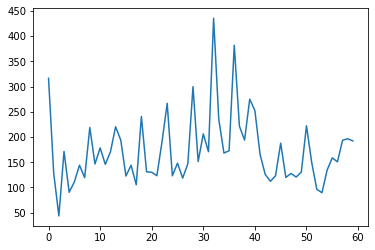

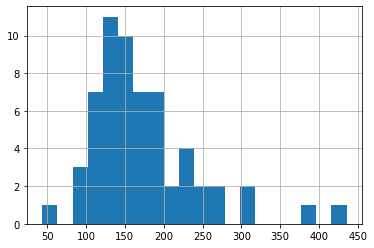

In [5]:
plt.plot(df['Non-urgent order'])
plt.show()

df['Non-urgent order'].hist(bins=20);


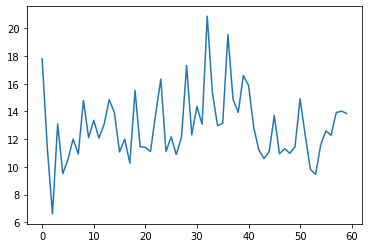

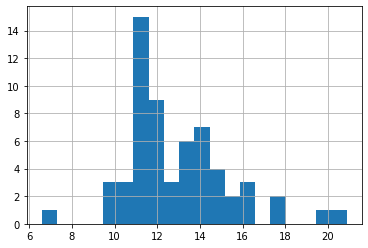

In [6]:
plt.plot(df['sqrt_non_urgent_order'])
plt.show()

df['sqrt_non_urgent_order'].hist(bins=20);


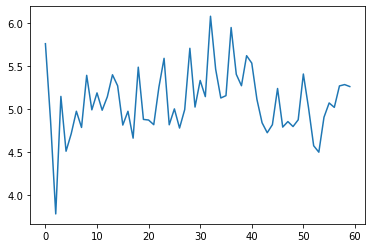

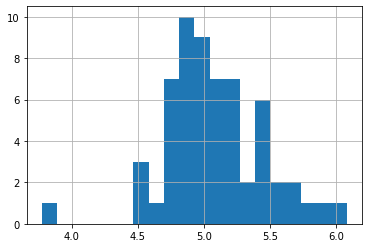

In [7]:
plt.plot(df['log_non_urgent_order'])
plt.show()

df['log_non_urgent_order'].hist(bins=20);


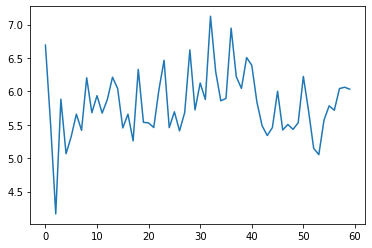

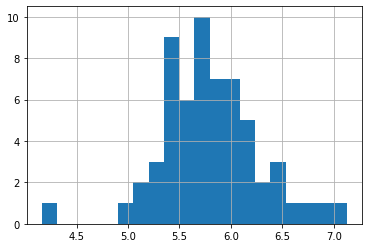

In [8]:
plt.plot(df['boxcox_non_urgent_order'])
plt.show()

df['boxcox_non_urgent_order'].hist(bins=20);
